### Spaceship Titanic 데이터 분석
* 우주선에서 승객을 보낼때, 다른 차원 이송되었는지, 아닌지 예측하기
* 데이터 출처 : https://www.kaggle.com/competitions/spaceship-titanic/data

#### Spaceship Titanic 데이터 분석

In [1]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
# 데이터 불러오기
sub = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.shape, test.shape, sub.shape

((8693, 14), (4277, 13), (4277, 2))

In [4]:
print( train.columns, end="\n\n")
print( test.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')


In [5]:
# 예측할 피처(특징)은 Transported
# Transported은 어떠한 값을 갖을까?

train['Transported'].unique()

array([False,  True])

In [6]:
test['Transported'].unique()  # test에는 예측할 컬럼이 없음. 에러 발생

KeyError: ignored

    01 우선 데이터를 나누고,
    02 모델을 선택 및 학습하고, 이를 토대로 자체 평가를 토대로 모델 최종 선택
    03 마지막 선택된 모델로 test의 Transported를 예측하고 제출

#### 01 데이터 나누기

In [7]:
 train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [9]:
# 결측치가 없고, 우선 숫자만 있는 것으로 모델을 구축해 보자.
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


(array([8.204e+03, 1.800e+02, 7.300e+01, 2.200e+01, 1.500e+01, 6.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2240.8,  4481.6,  6722.4,  8963.2, 11204. , 13444.8,
        15685.6, 17926.4, 20167.2, 22408. ]),
 <a list of 10 Patch objects>)

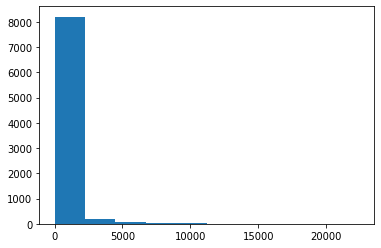

In [10]:
# 숫자이면서 결측치가 다 있음. 따라서 몇개만 결측치를 처리하고 3개만 하는 것으로 한다.
# sel = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.hist(train['Spa'])

    데이터 분포는 전부 비슷함.
    'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' 를 전부 중앙값으로 결측치 처리하자.
    먼저 train한 이후에 test도 진행.

In [11]:
# 비어 있는 행 선택 후, 컬럼은 'RoomService' 선택 후, 중앙값으로 넣기
train.loc[ train['RoomService'].isnull() , 'RoomService' ] = train['RoomService'].median()
train.loc[ train['FoodCourt'].isnull() , 'FoodCourt' ] = train['FoodCourt'].median()
train.loc[ train['ShoppingMall'].isnull() , 'ShoppingMall' ] = train['ShoppingMall'].median()
train.loc[ train['Spa'].isnull() , 'Spa' ] = train['Spa'].median()

# 비어 있는지 확인
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
# test 데이터 셋도 동일하게 처리
# 비어 있는 행 선택 후, 컬럼은 'RoomService' 선택 후, 중앙값으로 넣기
test.loc[ test['RoomService'].isnull() , 'RoomService' ] = test['RoomService'].median()
test.loc[ test['FoodCourt'].isnull() , 'FoodCourt' ] = test['FoodCourt'].median()
test.loc[ test['ShoppingMall'].isnull() , 'ShoppingMall'] = test['ShoppingMall'].median()
test.loc[ test['Spa'].isnull() , 'Spa' ] = test['Spa'].median()

# 비어 있는지 확인
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck           80
Name             94
dtype: int64

In [13]:
train['Transported'].unique()

array([False,  True])

In [14]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [15]:
a = train.iloc[ 0, -1]

In [16]:
print(a, type(a))

False <class 'numpy.bool_'>


In [17]:
print(train.Transported.unique())
train.head()

[False  True]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
# train['Transported'] = train['Transported'].astype()

In [19]:
# 우선 결측치 처리된 컬럼을 이용해 보자.
sel = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa']

X = train[sel]
y = train['Transported']

last_test = test[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state = 0)

y_train.shape

(6085,)

In [20]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6085 entries, 7289 to 2732
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoomService   6085 non-null   float64
 1   FoodCourt     6085 non-null   float64
 2   ShoppingMall  6085 non-null   float64
 3   Spa           6085 non-null   float64
dtypes: float64(4)
memory usage: 237.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 3601 to 5117
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoomService   2608 non-null   float64
 1   FoodCourt     2608 non-null   float64
 2   ShoppingMall  2608 non-null   float64
 3   Spa           2608 non-null   float64
dtypes: float64(4)
memory usage: 101.9 KB


(None, None)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
print("학습용 정확도 : ", model1.score(X_train,y_train) )
print("테스트용 정확도 : ", model1.score(X_test,y_test) )

학습용 정확도 :  0.8042728019720624
테스트용 정확도 :  0.7473159509202454


In [22]:
model2 = DecisionTreeClassifier(max_depth=3, random_state=0)
model2.fit(X_train, y_train)
print("학습용 정확도 : ", model2.score(X_train,y_train) )
print("테스트용 정확도 : ", model2.score(X_test,y_test) )

학습용 정확도 :  0.7410024650780608
테스트용 정확도 :  0.7315950920245399


In [23]:
model3 = RandomForestClassifier(max_depth=3, random_state=0)
model3.fit(X_train, y_train)
print("학습용 정확도 : ", model3.score(X_train,y_train) )
print("테스트용 정확도 : ", model3.score(X_test,y_test) )

학습용 정확도 :  0.752670501232539
테스트용 정확도 :  0.7430981595092024


In [24]:
# knn 모델이 좋아보임. 우선은 이걸로 최종 모델을 해 본다. k값은 최적으로 맞춘다.
k_num = range(1, 40, 2)

for num in k_num:
    model1 = KNeighborsClassifier(n_neighbors=num)
    model1.fit(X_train, y_train)
    
    print("k 값 : ", num)
    print("학습용 정확도 : ", model1.score(X_train,y_train) )
    print("테스트용 정확도 : ", model1.score(X_test,y_test) )

k 값 :  1
학습용 정확도 :  0.9059983566146261
테스트용 정확도 :  0.7177914110429447
k 값 :  3
학습용 정확도 :  0.8200493015612161
테스트용 정확도 :  0.741180981595092
k 값 :  5
학습용 정확도 :  0.8042728019720624
테스트용 정확도 :  0.7473159509202454
k 값 :  7
학습용 정확도 :  0.7978635990139687
테스트용 정확도 :  0.7488496932515337
k 값 :  9
학습용 정확도 :  0.7932621199671323
테스트용 정확도 :  0.7569018404907976
k 값 :  11
학습용 정확도 :  0.7888249794576828
테스트용 정확도 :  0.75920245398773
k 값 :  13
학습용 정확도 :  0.7880032867707477
테스트용 정확도 :  0.7657208588957055
k 값 :  15
학습용 정확도 :  0.7866885784716516
테스트용 정확도 :  0.7672546012269938
k 값 :  17
학습용 정확도 :  0.7866885784716516
테스트용 정확도 :  0.7684049079754601
k 값 :  19
학습용 정확도 :  0.7827444535743632
테스트용 정확도 :  0.7699386503067485
k 값 :  21
학습용 정확도 :  0.7824157764995892
테스트용 정확도 :  0.7695552147239264
k 값 :  23
학습용 정확도 :  0.780772391125719
테스트용 정확도 :  0.7699386503067485
k 값 :  25
학습용 정확도 :  0.7797863599013969
테스트용 정확도 :  0.7676380368098159
k 값 :  27
학습용 정확도 :  0.7784716516023007
테스트용 정확도 :  0.7676380368098159
k 값 :  29
학습용 정

In [25]:
# k=23일때가 가장 좋음. 최종 모델을 k=23으로 하자.
model1 = KNeighborsClassifier(n_neighbors=23)
model1.fit(X_train, y_train)
pred = model1.predict(last_test)
pred[0:10]

array([ True, False,  True,  True, False, False,  True,  True,  True,
       False])

In [26]:
### 제출용 파일 생성
sub.columns

Index(['PassengerId', 'Transported'], dtype='object')

In [28]:
sub['Transported'] = pred
sub.to_csv("first_sub.csv", index=False)

In [29]:
# 베이스라인 모델 점수 : Score: 0.78068

### Spaceship Titanic 데이터 분석

#### 01. 데이터 준비 및 라이브러리 임포트

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [31]:
import time
import warnings
warnings.filterwarnings('ignore')

In [32]:
# 데이터 불러오기
sub = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.shape, test.shape, sub.shape

((8693, 14), (4277, 13), (4277, 2))

In [33]:
print( train.columns, end="\n\n")
print( test.columns )

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')


In [34]:
# 예측할 피처(특징)은 Transported
# Transported은 어떠한 값을 갖을까?

train['Transported'].unique()

array([False,  True])

In [35]:
# 결측치 확인
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [36]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [37]:
# 각 변수의 기본 통계량 확인
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [38]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


#### 02. 데이터 살펴보기(EDA)

In [39]:
### PassengerId 삭제 및 특징(feature)명

train_n = train.drop(["PassengerId"] , axis = 1)
test_n = test.drop(["PassengerId"] , axis = 1)

TARGET = 'Transported'
FEATURES = [col for col in train_n.columns if col != TARGET]
FEATURES

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

In [40]:
# Feature 살펴보기
# 각 feature의 중복을 제외한 유일한 값의 갯수
print(FEATURES)
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0)

# 일부 특징 값 확인.
print( df["HomePlanet"].nunique() )
print( df["CryoSleep"].nunique() )
print( df["Cabin"].nunique() )

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']
3
2
9825


In [41]:
# 텍스트(text), 범주형(category), 연속형(continuous) 자료로 분류
# 변수별 feature 분류
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0)

text_features = ["Cabin", "Name"]
cat_features = [col for col in FEATURES 
                       if df[col].nunique() < 25 and col not in text_features ]
cont_features = [col for col in FEATURES 
                       if df[col].nunique() >= 25 and col not in text_features ]

print( text_features )
print( cat_features )
print( cont_features )

['Cabin', 'Name']
['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [42]:
del df

print(f'Total number of features: {len(FEATURES)}')
print(f'Number of categorical features: {len(cat_features)}')
print(f'Number of continuos features: {len(cont_features)}')
print(f'Number of text features: {len(text_features)}')

Total number of features: 12
Number of categorical features: 4
Number of continuos features: 6
Number of text features: 2


In [43]:
# feature별 분류
labels=['Categorical', 'Continuous', "Text"]  # 범주형, 연속형, 텍스트 
values= [len(cat_features), len(cont_features), len(text_features)]
colors = ['#DE3163', '#58D68D']

fig = go.Figure(data=[go.Pie(
                labels=labels, 
                values=values, 
                pull=[0.2, 0.1, 0 ],   # 중심에서 띄우는 정도
                marker=dict(colors=colors, 
                line=dict(color='#000000', width=3))  # line : 외곽테두리선
)])

fig.show()

In [44]:
# 연속형 변수의 피처(Feature) 분포
# 나이의 분포

train_age = train_n.copy()
test_age = test_n.copy()

# 학습용/테스트용 분류를 위한 type컬럼 생성
train_age["type"] = "Train"
test_age["type"] = "Test"

# train, test 결합
ageDf = pd.concat([train_age, test_age])

# plotly를 활용한 히스토그램 시각화
fig = px.histogram(data_frame = ageDf, 
                x="Age",
                color= "type",   # train, test의 종류 구분(컬럼)
                color_discrete_sequence =  ['#58D68D','#DE3163'],
                marginal="box", # subplot를 추가 가능. (rug, box)
                nbins= 100,     # 구간 막대 기준 개수 
                template="plotly_white"
                )

# title_x : 좌우 정렬할 위치(좌:0, 우:1)
fig.update_layout(title = "Distribution of Age" , title_x = 0.5)
fig.show()

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


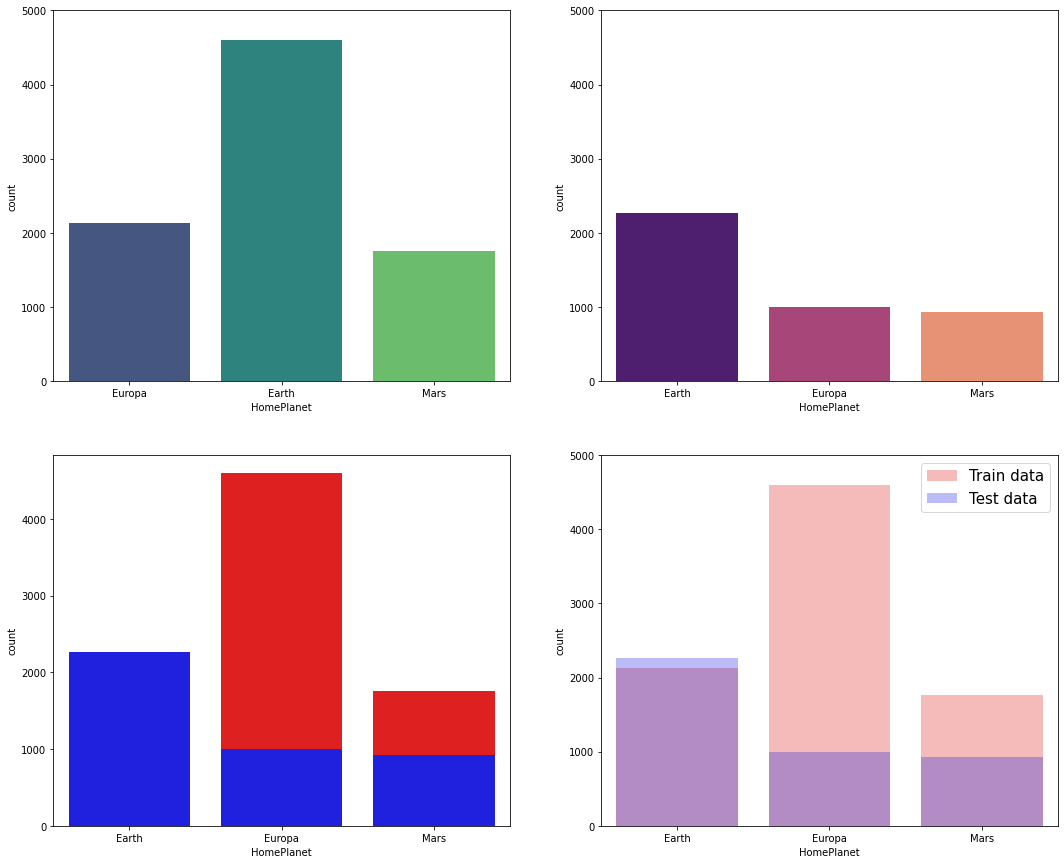

In [45]:
# 범주형 변수의 분포
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
print( cat_features )

sns.countplot(train_n["HomePlanet"],ax = axes[0,0],palette = "viridis",label='Train data')
sns.countplot(test_n["HomePlanet"],ax = axes[0,1],palette = "magma",label='Test data')

sns.countplot(train_n["HomePlanet"],ax = axes[1,0],
              color = "red",label='Train data')
sns.countplot(test_n["HomePlanet"],ax = axes[1,0],
              color = "blue",label='Test data')

sns.countplot(train_n["HomePlanet"],ax = axes[1,1],
              color = "red",label='Train data', alpha=0.3)
sns.countplot(test_n["HomePlanet"],ax = axes[1,1],
              color = "blue",label='Test data', alpha=0.3)

axes[0,0].set_ylim(0,5000)
axes[0,1].set_ylim(0,5000)
axes[1,1].set_ylim(0,5000)
axes[1,1].legend(fontsize=15)   # 범례

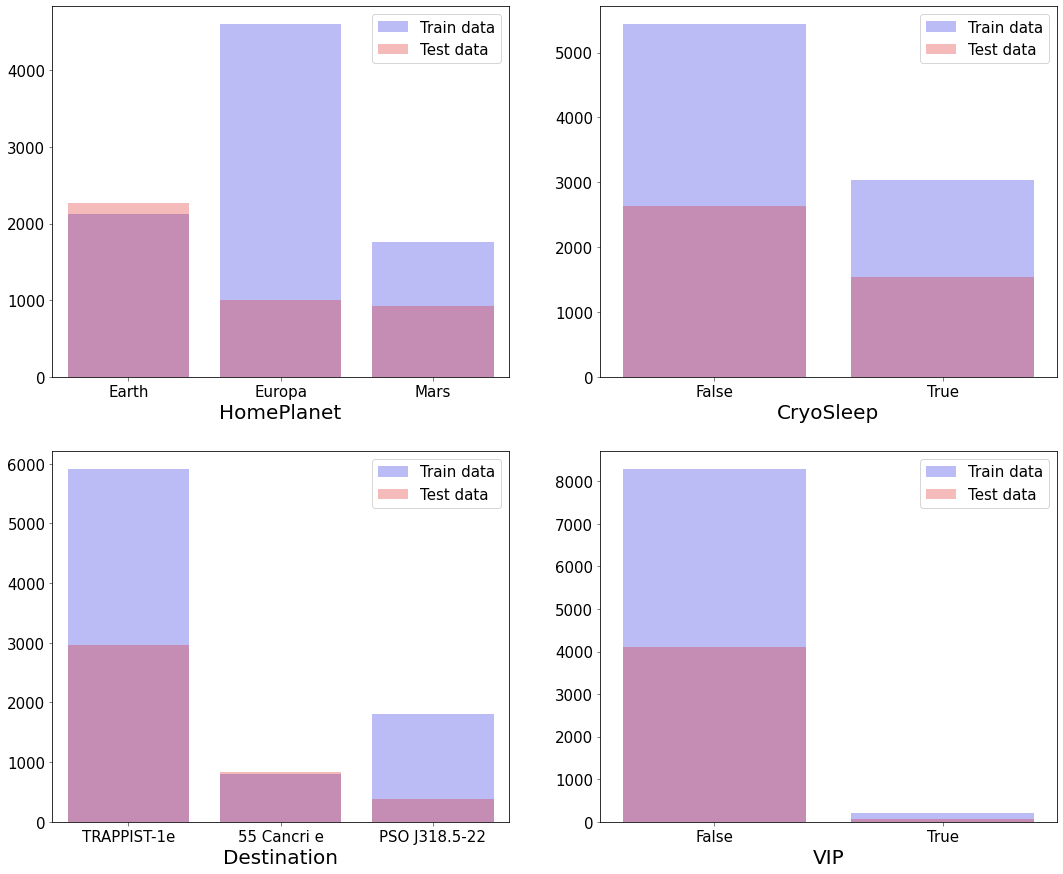

In [46]:
if len(cat_features) == 0 :
    print("No Categorical features")
else:
    ncols = 2
    nrows = 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 15))
    for r in range(nrows):
        for c in range(ncols):
            col = cat_features[r*ncols+c]
            
            sns.countplot(train_n[col],ax = axes[r,c],
                          color="blue",
                          label='Train data', alpha=0.3)
            sns.countplot(test_n[col],ax = axes[r,c],
                          color="red",
                          label='Test data', alpha=0.3)

            axes[r,c].legend(fontsize=15)   # 범례

            # x축, y축 레이블
            axes[r,c].set_ylabel('')        
            axes[r,c].set_xlabel(col, fontsize=20)
            axes[r,c].tick_params(labelsize=15, width=0.5)
            axes[r,c].xaxis.offsetText.set_fontsize(4)
            axes[r,c].yaxis.offsetText.set_fontsize(4)
    plt.show()

##### Target 값의 분포
    두 개의 target 값이 있다.
    0과 1
    target값 둘 다 거의 동일한 분포를 갖는다.

In [47]:
print( TARGET )
print( train_n[TARGET].value_counts() )

target_df = pd.DataFrame(train_n[TARGET].value_counts()).reset_index()
print(target_df)

Transported
True     4378
False    4315
Name: Transported, dtype: int64
   index  Transported
0   True         4378
1  False         4315


In [48]:
target_df = pd.DataFrame(train_n[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']

fig = px.bar(data_frame =target_df, x = TARGET, y = 'count'  ) 

fig.update_traces(marker_color =['#58D68D','#DE3163'], 
                  marker_line_color='rgb(0,0,0)',
                  marker_line_width=2,)

fig.update_layout(title = "Target Distribution", 
                  template = "plotly_white",
                  title_x = 0.5)

percent_0 = target_df["count"][0] *100 / train_n.shape[0]
percent_1 = target_df["count"][1]* 100 / train_n.shape[0]

print("Transported(0)의 비율 {:.2f} %".format( percent_0 ))
print("Transported(1)의 비율 {:.2f} %".format( percent_1 ))

fig.show()

Transported(0)의 비율 50.36 %
Transported(1)의 비율 49.64 %


In [49]:
# 상관계수 행렬
fig = px.imshow(train_n.corr(),
                text_auto=True, 
                aspect="auto" , 
                color_continuous_scale = "viridis")
fig.show()

#### 03. 데이터 전처리

In [50]:
# SimpleImputer 예제
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

##########데이터 로드

df = pd.DataFrame([
    [2, 1, 3 , 3],
    [3, 2, 4, 5],
    [3, np.nan, 4, 7],
    [5, np.nan, 5, 10],
    [7, 5, 6, 12],
    [2, 5, np.nan, 7],
    [8, 9, np.nan, 13],
], columns=['hour', 'attendance', 'assignment','score'])


print(df.isnull().sum())
df

hour          0
attendance    2
assignment    2
score         0
dtype: int64


,hour,attendance,assignment,score
0,2,1.0,3.0,3
1,3,2.0,4.0,5
2,3,NaN,4.0,7
3,5,NaN,5.0,10
4,7,5.0,6.0,12
5,2,5.0,NaN,7
6,8,9.0,NaN,13


In [51]:
x_data = df.drop(['score'], axis=1) 
y_data = df['score']

transformer = SimpleImputer()
transformer.fit(x_data)
x_data = transformer.transform(x_data)
print(x_data)

[[2.  1.  3. ]
 [3.  2.  4. ]
 [3.  4.4 4. ]
 [5.  4.4 5. ]
 [7.  5.  6. ]
 [2.  5.  4.4]
 [8.  9.  4.4]]


In [52]:
# SimpleImputer를 이용한 결측치 처리
train_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [53]:
print( train_n["HomePlanet"].value_counts() )
print( test_n["HomePlanet"].value_counts() )
print( train_n["HomePlanet"].unique(), test_n["HomePlanet"].unique() )

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64
['Europa' 'Earth' 'Mars' nan] ['Earth' 'Europa' 'Mars' nan]


In [54]:
STRATEGY = 'median'

imputer_cols = ["Age", "RoomService", "FoodCourt", 
                "ShoppingMall", "Spa", "VRDeck"]

# 결측치 대치       
imputer = SimpleImputer(strategy=STRATEGY )
imputer.fit(train_n[imputer_cols])
train_n[imputer_cols] = imputer.transform(train_n[imputer_cols])
test_n[imputer_cols] = imputer.transform(test_n[imputer_cols])

train_n["HomePlanet"].fillna('Z', inplace=True)
test_n["HomePlanet"].fillna('Z', inplace=True)

print( train_n[imputer_cols].isnull().sum() )
print( test_n[imputer_cols].isnull().sum() )

train_n.isnull().sum(), test_n.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


(HomePlanet        0
 CryoSleep       217
 Cabin           199
 Destination     182
 Age               0
 VIP             203
 RoomService       0
 FoodCourt         0
 ShoppingMall      0
 Spa               0
 VRDeck            0
 Name            200
 Transported       0
 dtype: int64, HomePlanet        0
 CryoSleep        93
 Cabin           100
 Destination      92
 Age               0
 VIP              93
 RoomService       0
 FoodCourt         0
 ShoppingMall      0
 Spa               0
 VRDeck            0
 Name             94
 dtype: int64)

In [55]:
# 범주형 변수 인코딩
# LabelEncoder()를 이용하여 라벨 인코딩이 가능.

label_cols = ["HomePlanet", "CryoSleep","Cabin", 
              "Destination" ,"VIP"]
              
def label_encoder(train,test,columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train_n ,test_n = label_encoder(train_n, test_n ,label_cols)

train_n[label_cols].head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,1,0,149,2,0
1,0,0,2184,2,0
2,1,0,1,2,1
3,1,0,1,2,0
4,0,0,2186,2,0


In [56]:
train_n.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
test_n.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)
X = train_n.drop(TARGET , axis =1 )
y = train_n[TARGET]
X_train , X_test , y_train , y_test = train_test_split(X , y, 
                                                       random_state = 12 ,
                                                       test_size =0.33)

#### 04. Modeling

In [57]:
train_n.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [58]:
test_n.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [59]:
train_n.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False


In [60]:
test_n.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0


In [61]:
# 기본 모델을 위해 특징은 5개만 선택하는 것으로 한다.
sel = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP']

X = train_n[sel]
y = train_n['Transported']

last_test = test_n[sel]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state = 0)

y_train.shape

(6085,)

In [62]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6085 entries, 7289 to 2732
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   6085 non-null   int64  
 1   CryoSleep    6085 non-null   int64  
 2   Destination  6085 non-null   int64  
 3   Age          6085 non-null   float64
 4   VIP          6085 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 285.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 3601 to 5117
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   2608 non-null   int64  
 1   CryoSleep    2608 non-null   int64  
 2   Destination  2608 non-null   int64  
 3   Age          2608 non-null   float64
 4   VIP          2608 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 122.2 KB


(None, None)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)
print("학습용 정확도 : ", model1.score(X_train,y_train) )
print("테스트용 정확도 : ", model1.score(X_test,y_test) )

학습용 정확도 :  0.7462612982744453
테스트용 정확도 :  0.6656441717791411


In [65]:
model2 = DecisionTreeClassifier(max_depth=3, random_state=0)
model2.fit(X_train, y_train)
print("학습용 정확도 : ", model2.score(X_train,y_train) )
print("테스트용 정확도 : ", model2.score(X_test,y_test) )

학습용 정확도 :  0.7391947411668036
테스트용 정확도 :  0.7319785276073619


In [66]:
# DecisionTreeClassifier 모델이 좋아보임. 우선은 이걸로 최종 모델을 해 본다. max_depth값은 최적으로 맞춘다.

depth_num = range(1, 7, 1)

for num in depth_num:
    model1 = DecisionTreeClassifier(max_depth=num, random_state=0)
    model1.fit(X_train, y_train)
    
    print("max_depth 값 : ", num)
    print("학습용 정확도 : ", model1.score(X_train,y_train) )
    print("테스트용 정확도 : ", model1.score(X_test,y_test) )

max_depth 값 :  1
학습용 정확도 :  0.7201314708299096
테스트용 정확도 :  0.7120398773006135
max_depth 값 :  2
학습용 정확도 :  0.7377156943303205
테스트용 정확도 :  0.727760736196319
max_depth 값 :  3
학습용 정확도 :  0.7391947411668036
테스트용 정확도 :  0.7319785276073619
max_depth 값 :  4
학습용 정확도 :  0.7403451109285127
테스트용 정확도 :  0.7304447852760736
max_depth 값 :  5
학습용 정확도 :  0.7437962202136401
테스트용 정확도 :  0.7300613496932515
max_depth 값 :  6
학습용 정확도 :  0.7498767460969598
테스트용 정확도 :  0.7292944785276073


In [67]:
# max_depth=3일때가 가장 좋음. 최종 모델을 의사결정트리 모델로 선택하고 max_depth는 3으로 하자.

In [68]:
model1 = DecisionTreeClassifier(max_depth=3, random_state=0)
model1.fit(X_train, y_train)
pred = model1.predict(last_test)
pred[0:10]

array([ True, False,  True, False, False, False,  True,  True,  True,
       False])

In [69]:
### 제출용 파일 생성
sub.columns

Index(['PassengerId', 'Transported'], dtype='object')

In [70]:
sub['Transported'] = pred
sub.to_csv("first_sub.csv", index=False)

In [71]:
# 베이스라인 모델 점수 : Score: 0.74374